In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func
                

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables

Base.prepare(engine, reflect=True)



In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x239bf59b280>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1}

In [10]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x239ba92dab0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [11]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

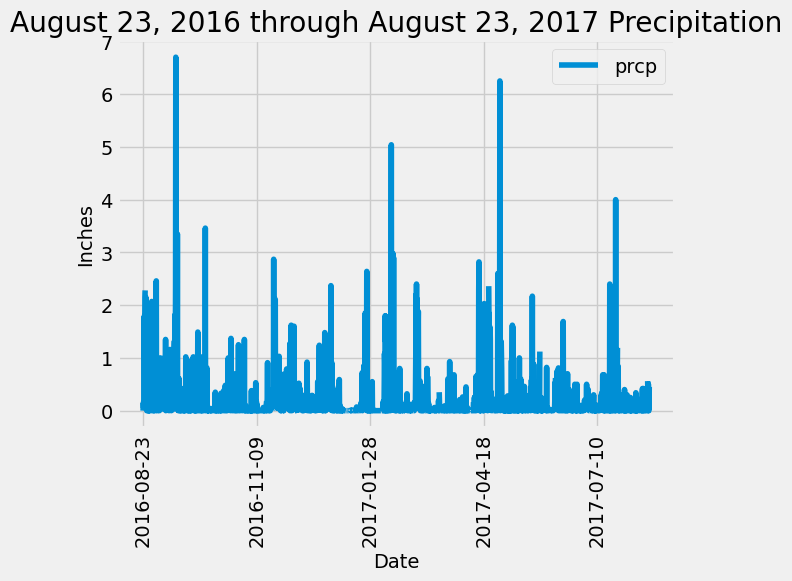

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)



# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp, Measurement.station).filter(Measurement.date > '2016-08-22').order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(results, columns=['date','prcp','station'])


# Sort the dataframe by date
sort = [{"Date": result[0], "Prcp": result[1]} for result in results]

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(x='date', y='prcp')

plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Inches')
plt.title('August 23, 2016 through August 23, 2017 Precipitation')

plt.show()

In [14]:
print(results)

[('2016-08-23', 0.0, 'USC00519397'), ('2016-08-23', 0.15, 'USC00513117'), ('2016-08-23', 0.05, 'USC00514830'), ('2016-08-23', None, 'USC00517948'), ('2016-08-23', 0.02, 'USC00519523'), ('2016-08-23', 1.79, 'USC00519281'), ('2016-08-23', 0.7, 'USC00516128'), ('2016-08-24', 0.08, 'USC00519397'), ('2016-08-24', 2.15, 'USC00513117'), ('2016-08-24', 2.28, 'USC00514830'), ('2016-08-24', None, 'USC00517948'), ('2016-08-24', 1.22, 'USC00519523'), ('2016-08-24', 2.15, 'USC00519281'), ('2016-08-24', 1.45, 'USC00516128'), ('2016-08-25', 0.08, 'USC00519397'), ('2016-08-25', 0.08, 'USC00513117'), ('2016-08-25', 0.0, 'USC00514830'), ('2016-08-25', 0.0, 'USC00517948'), ('2016-08-25', 0.21, 'USC00519523'), ('2016-08-25', 0.06, 'USC00519281'), ('2016-08-25', 0.11, 'USC00516128'), ('2016-08-26', 0.0, 'USC00519397'), ('2016-08-26', 0.03, 'USC00513117'), ('2016-08-26', 0.02, 'USC00514830'), ('2016-08-26', 0.04, 'USC00517948'), ('2016-08-26', 0.0, 'USC00519523'), ('2016-08-26', 0.01, 'USC00519281'), ('2016

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = rain_df['prcp'].describe()
summary

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()


9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Query to calculate lowest, highest, and average temperature for the most active station

query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
        func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281')
result = query.one()
result


(54.0, 85.0, 71.66378066378067)

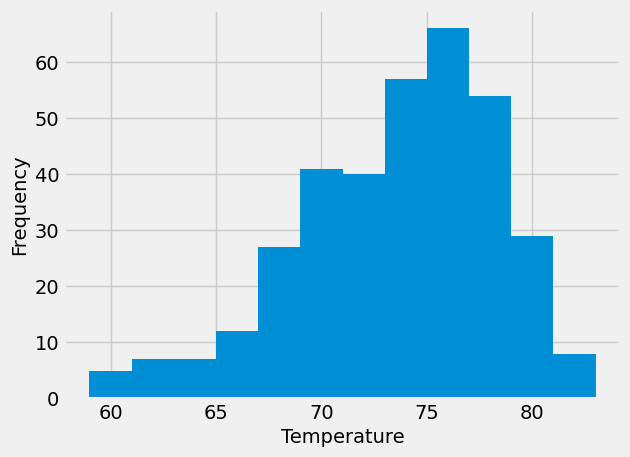

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observed = session.query(Measurement.tobs, Measurement.prcp, Measurement.station).filter(Measurement.station == 'USC00519281',
    Measurement.date >= '2016-08-22').order_by(Measurement.station).all()


temp_df = pd.DataFrame(observed, columns=['tobs','prcp','station'])


plt.hist(temp_df['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()













# Close Session

In [ ]:
# Close Session
session.close()